In [20]:
import matplotlib.pyplot as plt
import numpy as np

In [21]:

class Investment_calculator():

    def __init__(self, monthly_savings, asset_cost, months):
        self.monthly_savings = monthly_savings
        self.asset_cost = asset_cost
        self.time_until_purchase = None
        self.months = months

    def prevision(self, months, monthly_savings, asset_cost, median_passive_revenue, loan=0, length_of_loan=0, interest_rate=0):
        ratio = 0
        month_passed = 0
        list_monthly_saving = []
        list_time_until_purchase = []
        original_asset_cost = self.asset_cost
        length_of_loan *= 12
        asset_cost = asset_cost - loan
        original_loan = loan
        if length_of_loan > 0:
            monthly_savings = monthly_savings - ((loan/length_of_loan) * (interest_rate/12))

        for month in range(months):

            if month == length_of_loan and length_of_loan > 0:
                monthly_savings = monthly_savings + ((original_loan/length_of_loan) * (interest_rate/12))
                       
            time_until_purchase = asset_cost/monthly_savings
            
            if month_passed < time_until_purchase:
                month_passed += 1
            else:
                if asset_cost >= 0:
                    asset_cost = original_asset_cost
                    loan = 0
                    month_passed = 0
                    monthly_savings += median_passive_revenue
                else:
                    
                    ratio = np.floor(((-asset_cost + original_asset_cost)/original_asset_cost))
                    loan = loan*(1-(((-asset_cost + original_asset_cost)/original_asset_cost)-ratio))
                    monthly_savings += median_passive_revenue*ratio
                    asset_cost = original_asset_cost-loan

                
            time_until_purchase = asset_cost/monthly_savings

            list_monthly_saving.append(monthly_savings)
            list_time_until_purchase.append(time_until_purchase)

        return list_monthly_saving, list_time_until_purchase, ratio
        

    def long_run_prevision(self, median_passive_revenue=0, percent_return_annual=0, loan=0, length_of_loan=0, interest_rate=0, verbose=True):
        
        if percent_return_annual != 0:
            median_passive_revenue = ((percent_return_annual/100)*self.asset_cost)/12

        list_monthly_saving, list_time_until_purchase, ratio = self.prevision(self.months, 
                                                                              self.monthly_savings, 
                                                                              self.asset_cost, 
                                                                              median_passive_revenue, 
                                                                              loan=loan, 
                                                                              length_of_loan=length_of_loan, 
                                                                              interest_rate=interest_rate
                                                                              )

        if verbose:
            ################################
            plt.figure(figsize=(10,10))
            plt.subplot(211)
            plt.plot(list_monthly_saving)
            for y in range(len(list_monthly_saving)):
                if list_monthly_saving[y-1] is not None and list_monthly_saving[y] != list_monthly_saving[y-1]:
                    plt.text(y, list_monthly_saving[y], '{:.2f} Months, {:.2f} € / Month'.format(list_time_until_purchase[y], list_monthly_saving[y]))

            plt.title("Monthly Savings")
            plt.subplot(212)
            plt.plot(list_time_until_purchase)

            for y in range(len(list_time_until_purchase)):
                if list_time_until_purchase[y-1] is not None and list_time_until_purchase[y] != list_time_until_purchase[y-1]:
                    plt.text(y, list_time_until_purchase[y], '{:.2f} Months, {:.2f} € / Month'.format(list_time_until_purchase[y], list_monthly_saving[y]))
            plt.title("Time until Purchase")
            plt.show()

        
        print(f"""
        Initial Monthly Saving: {list_monthly_saving[0]:.2f} €
        Initial Time until purchase: {list_time_until_purchase[0]:.2f} months
        Final Monthly Saving: {list_monthly_saving[-1]:.2f} €
        Final Time until purchase: {list_time_until_purchase[-1]:.2f} months
        Difference Intial vs Final Monthly Saving: {list_monthly_saving[-1] - list_monthly_saving[0]:.2f} €
        Difference Intial vs Final Time until purchase: {list_time_until_purchase[-1] - list_time_until_purchase[0]:.2f} months
        Number of Assets baught after {self.months} months: {len(set(list_monthly_saving)) - 1 + ratio:.2f}
        Annual after tax return on investment %: {(median_passive_revenue*12/self.asset_cost)*100:.2f} %
        Median passive revenue: {median_passive_revenue:.2f} €
        Loan monthly payment: {((loan/(length_of_loan*12)) * (interest_rate/12)):.2f} €
        """)


In [22]:
monthly_savings = 3000 # Modifiable
asset_cost = 28000 # Modifiable
time_until_purchase = asset_cost/monthly_savings
years = 11
months = years*12 # Modifiable
median_passive_revenue = 50

In [23]:
investment = Investment_calculator(monthly_savings, asset_cost, months) # monthly_savings, asset_cost, months, median_passive_revenue

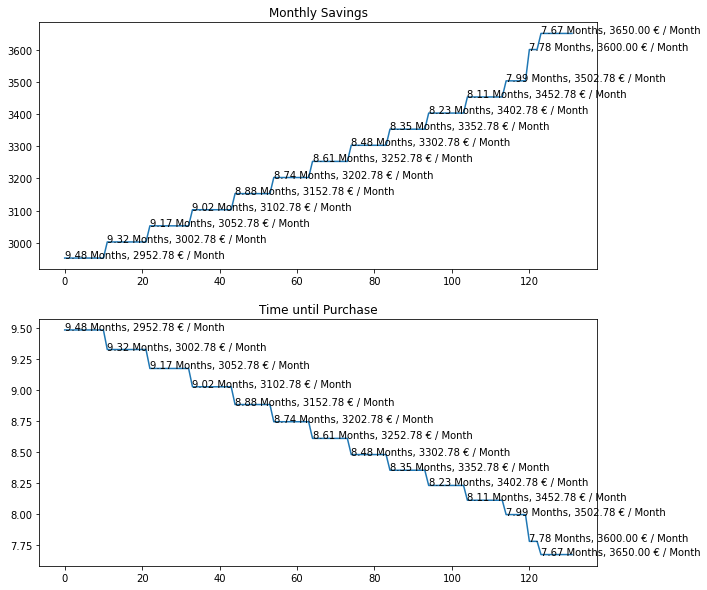


        Initial Monthly Saving: 2952.78 €
        Initial Time until purchase: 9.48 months
        Final Monthly Saving: 3650.00 €
        Final Time until purchase: 7.67 months
        Difference Intial vs Final Monthly Saving: 697.22 €
        Difference Intial vs Final Time until purchase: -1.81 months
        Number of Assets baught after 132 months: 13.00
        Annual after tax return on investment %: 2.14 %
        Median passive revenue: 50.00 €
        Loan monthly payment: 97.22 €
        


In [33]:
investment.long_run_prevision(median_passive_revenue=median_passive_revenue, loan=28000, length_of_loan=10, interest_rate=5)

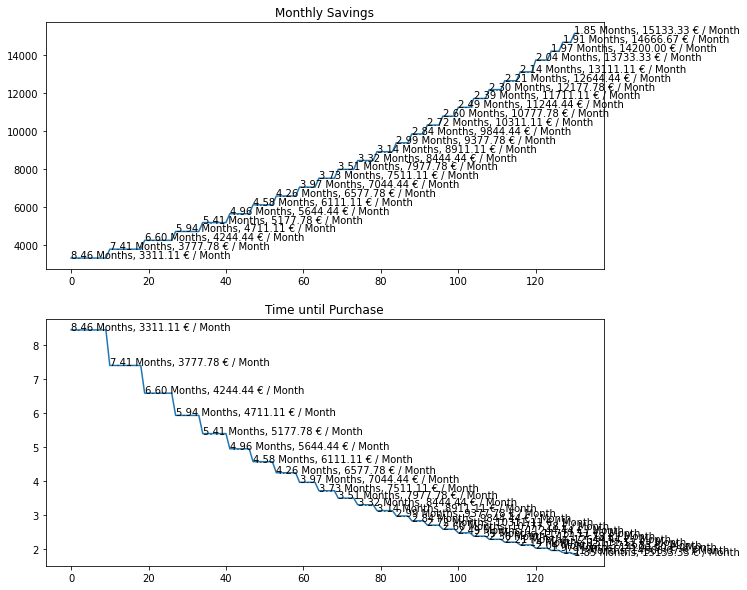


        Initial Monthly Saving: 3311.11 €
        Initial Time until purchase: 8.46 months
        Final Monthly Saving: 15133.33 €
        Final Time until purchase: 1.85 months
        Difference Intial vs Final Monthly Saving: 11822.22 €
        Difference Intial vs Final Time until purchase: -6.61 months
        Number of Assets baught after 132 months: 25.00
        Annual after tax return on investment %: 20.00 %
        Median passive revenue: 466.67 €
        Loan monthly payment: 155.56 €
        


In [36]:
investment.long_run_prevision(percent_return_annual=20, loan=28000, length_of_loan=10, interest_rate=8)